##### Exploring Population Metadata Exercise
You've now learned how to explore individual images and their associated data as you prepare them for machine learning. The other important aspect of EDA is exploring your population. In this exercise, you'll be given a dataframe that describes a large dataset. Your goal is to perform EDA on the population in the dataset such that you can answer the following questions:

How are the different diseases distributed in my dataset in terms of frequency and co-occurrence with one another? (For the sake of time, just choose one of the diseases and assess its co-occurrence frequencies with all other diseases.)
How is age distributed across my dataset? Is it distributed differently for different diseases?
How is sex distributed across my dataset? Is it distributed differently for different diseases?
For findings that have a Mass_size (i.e. not just a binary classification of disease presence) is there a relationship between size and age, sex, or presence of other diseases?

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

from itertools import chain
from random import sample 
import scipy

# Set seaborn style
sns.set_theme()

In [2]:
data = pd.read_csv('findings_data.csv')

In [3]:
data.head()

,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size
0,1,1,Cardiomegaly|Emphysema,57,M,NaN
1,2,2,No Finding,77,M,NaN
2,3,3,Atelectasis,79,M,NaN
3,4,4,Cardiomegaly|Edema|Effusion,55,F,NaN
4,5,5,Consolidation|Mass,68,M,2516.0


In [4]:
data.describe()

,Unnamed: 0,Patient ID,Patient Age,Mass_Size
count,999.000000,999.000000,999.000000,35.000000
mean,500.000000,500.000000,49.117117,1656.457143
std,288.530761,288.530761,16.036509,866.779073
min,1.000000,1.000000,6.000000,320.000000
25%,250.500000,250.500000,39.000000,932.500000
50%,500.000000,500.000000,51.000000,1488.000000
75%,749.500000,749.500000,60.000000,2416.500000
max,999.000000,999.000000,87.000000,3654.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      999 non-null    int64  
 1   Patient ID      999 non-null    int64  
 2   Finding Labels  999 non-null    object 
 3   Patient Age     999 non-null    int64  
 4   Patient Gender  999 non-null    object 
 5   Mass_Size       35 non-null     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [6]:
print(data)

     Unnamed: 0  Patient ID               Finding Labels  Patient Age  \
0             1           1       Cardiomegaly|Emphysema           57   
1             2           2                   No Finding           77   
2             3           3                  Atelectasis           79   
3             4           4  Cardiomegaly|Edema|Effusion           55   
4             5           5           Consolidation|Mass           68   
..          ...         ...                          ...          ...   
994         995         995                   No Finding           40   
995         996         996            Infiltration|Mass           38   
996         997         997                       Nodule           38   
997         998         998                       Nodule           38   
998         999         999                       Nodule           38   

    Patient Gender  Mass_Size  
0                M        NaN  
1                M        NaN  
2                M        N

In [7]:
## Here I'm just going to split up my "Finding Labels" column so that I have one column in my dataframe
# per disease, with a binary flag. This makes EDA a lot easier! 

all_labels = np.unique(list(chain(*data['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        data[c_label] = data['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
data.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
419,420,420,Atelectasis,37,M,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490,491,491,No Finding,34,M,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
140,141,141,No Finding,51,F,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
len(all_labels)

14

I see here that there are 14 unique types of labels found in my dataset

In [9]:
data[all_labels].sum()/len(data)

Atelectasis           0.093093
Cardiomegaly          0.038038
Consolidation         0.043043
Edema                 0.016016
Effusion              0.095095
Emphysema             0.018018
Fibrosis              0.027027
Infiltration          0.134134
Mass                  0.035035
No Finding            0.575576
Nodule                0.041041
Pleural_Thickening    0.032032
Pneumonia             0.006006
Pneumothorax          0.033033
dtype: float64

[Text(0, 0.5, 'Number of Images with label')]

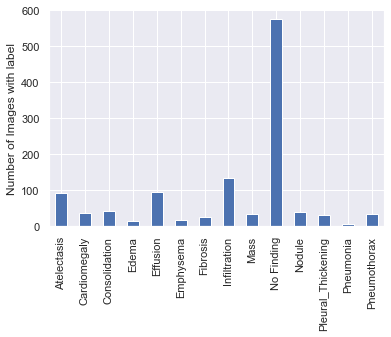

In [10]:
ax = data[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with label')